## Dataset

In [47]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
x = np.array([
    9.1, 8, 9.1, 8.4, 6.9, 7.7, 15.6, 7.3, 7, 7.2, 10.1, 11.5, 7.1, 10, 8.9,
    7.9, 5.6, 6.3, 6.7, 10.4, 8.5, 7.4, 6.3, 5.4, 8.9, 9.4, 7.5, 11.9, 7.8,
    7.4, 10.8, 10.2, 6.2, 7.7, 13.7, 8, 6.7, 6.7, 7, 8.3, 7.4, 9.9, 6.1, 7,
    5.4, 10.7, 7.6, 8.9, 9.2, 6.6, 7.2, 8, 7.8, 7.9, 7, 7, 7.6, 9.1, 9, 7.9,
    6.6, 11.9, 6.5, 7.1, 8.8, 7.5, 7.7, 6, 10.6, 6.6, 8.2, 7.9, 7.1, 5.6, 6.4,
    7.5, 9.8, 7, 10.5, 7.1, 6.2, 6.5, 7.7, 7.2, 9.3, 8.5, 7.7, 6.8, 7.8, 8.7,
    9.6, 7.2, 9.3, 8.1, 6.6, 7.8, 10.2, 6.1, 7.3, 7.3
])
y = np.array([
    0.99523, 0.99007, 0.99769, 0.99386, 0.99508, 0.9963, 1.0032, 0.99768, 0.99584,
    0.99609, 0.99774, 1.0003, 0.99694, 0.99965, 0.99549, 0.99364, 0.99378, 0.99379,
    0.99524, 0.9988, 0.99733, 0.9966, 0.9955, 0.99471, 0.99354, 0.99786, 0.9965,
    0.9988, 0.9964, 0.99713, 0.9985, 0.99565, 0.99578, 0.9976, 1.0014, 0.99685,
    0.99648, 0.99472, 0.99914, 0.99408, 0.9974, 1.0002, 0.99402, 0.9966, 0.99402,
    1.0029, 0.99718, 0.9986, 0.9952, 0.9952, 0.9972, 0.9976, 0.9968, 0.9978, 0.9951,
    0.99629, 0.99656, 0.999, 0.99836, 0.99396, 0.99387, 1.0004, 0.9972, 0.9972,
    0.99546, 0.9978, 0.99596, 0.99572, 0.9992, 0.99544, 0.99747, 0.99668, 0.9962,
    0.99346, 0.99514, 0.99476, 1.001, 0.9961, 0.99598, 0.99608, 0.9966, 0.99732,
    0.9962, 0.99546, 0.99738, 0.99456, 0.9966, 0.99553, 0.9984, 0.9952, 0.997,
    0.99586, 0.9984, 0.99542, 0.99655, 0.9962, 0.9976, 0.99464, 0.9983, 0.9967
])

# Normalize x
def normalize(data):
    return (data - np.mean(data)) / np.std(data)

x_norm = normalize(x)


### Gradient Descent Functions

In [27]:
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x

def cost_function(theta0, theta1, x, y):
    m = len(y)
    return (1 / (2 * m)) * np.sum((hypothesis(theta0, theta1, x) - y) ** 2)

def gradient_descent(x, y, learning_rate, iterations, convergence_criteria=1e-6):
    theta0, theta1 = 0, 0
    m = len(y)
    costs = []
    for _ in range(iterations):
        h = hypothesis(theta0, theta1, x)
        d_theta0 = (1 / m) * np.sum(h - y)
        d_theta1 = (1 / m) * np.sum((h - y) * x)
        theta0 -= learning_rate * d_theta0
        theta1 -= learning_rate * d_theta1
        cost = cost_function(theta0, theta1, x, y)
        costs.append(cost)
        if len(costs) > 1 and abs(costs[-1] - costs[-2]) < convergence_criteria:
            break
    return theta0, theta1, costs


### Question 1

Final theta0: 0.9961334690917968, theta1: 0.0013395416259238116
Final cost: 1.313194845507832e-06


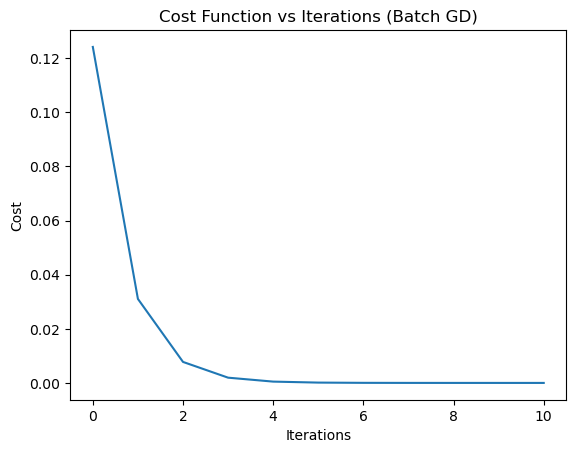

In [29]:
# 1. Batch Gradient Descent with learning rate 0.5
learning_rate = 0.5
iterations = 50
theta0, theta1, costs = gradient_descent(x_norm, y, learning_rate=learning_rate, iterations=iterations)
print(f"Final theta0: {theta0}, theta1: {theta1}")
print(f"Final cost: {costs[-1]}")

# Plot cost vs iterations
plt.plot(range(len(costs)), costs)
plt.title("Cost Function vs Iterations (Batch GD)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


### question 2


In [22]:

print("Advantage: Averaging the cost makes the updates more stable and prevents large oscillations in parameter updates.")


Advantage: Averaging the cost makes the updates more stable and prevents large oscillations in parameter updates.


#### Question 3


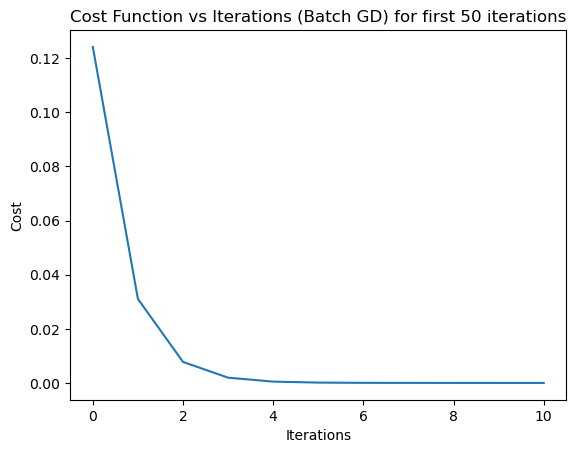

In [31]:
# 1. Batch Gradient Descent with learning rate 0.5 for the first 50 iterations
learning_rate = 0.5
iterations = 50
theta0, theta1, costs = gradient_descent(x_norm, y, learning_rate=learning_rate, iterations=iterations)

# Plot cost function vs iterations
plt.plot(range(len(costs)), costs)
plt.title("Cost Function vs Iterations (Batch GD) for first 50 iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


### Question 4

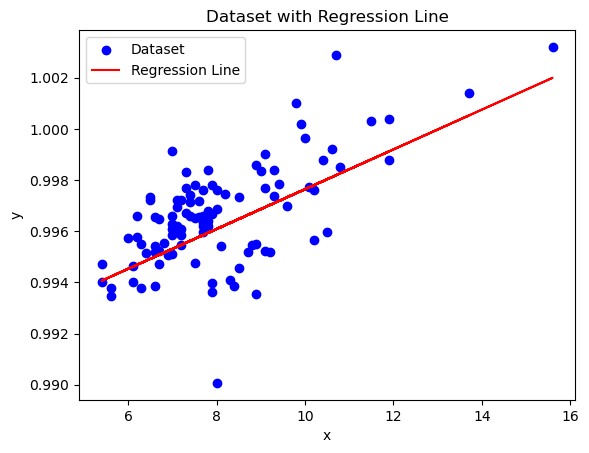

In [33]:

plt.scatter(x, y, label="Dataset", color="blue")
plt.plot(x, hypothesis(theta0, theta1, x_norm), label="Regression Line", color="red")
plt.title("Dataset with Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


#### Question 5


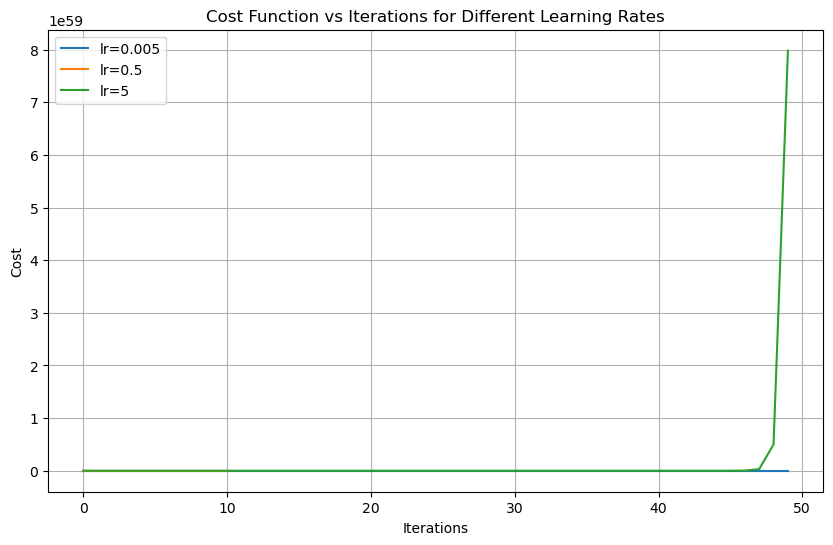

In [35]:
# 5. Test your regression model with different learning rates and plot the cost function for the first 50 iterations
learning_rates = [0.005, 0.5, 5]
plt.figure(figsize=(10, 6))  # Create a larger figure for better clarity

for lr in learning_rates:
    _, _, costs = gradient_descent(x_norm, y, learning_rate=lr, iterations=50)  # Perform gradient descent
    plt.plot(range(len(costs)), costs, label=f"lr={lr}")

# Title and labels for the plot
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()


#### Question 6


In [39]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(x, y, learning_rate, iterations):
    theta0, theta1 = 0, 0
    m = len(y)
    costs = []
    for _ in range(iterations):
        for i in range(m):
            xi, yi = x[i], y[i]
            h = hypothesis(theta0, theta1, xi)
            d_theta0 = h - yi
            d_theta1 = (h - yi) * xi
            theta0 -= learning_rate * d_theta0
            theta1 -= learning_rate * d_theta1
        cost = cost_function(theta0, theta1, x, y)
        costs.append(cost)
    return theta0, theta1, costs


In [43]:
# Mini-batch Gradient Descent
def mini_batch_gradient_descent(x, y, learning_rate, iterations, batch_size=10):
    theta0, theta1 = 0, 0
    m = len(y)
    costs = []
    for _ in range(iterations):
        for i in range(0, m, batch_size):
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            h = hypothesis(theta0, theta1, x_batch)
            d_theta0 = (1 / len(y_batch)) * np.sum(h - y_batch)
            d_theta1 = (1 / len(y_batch)) * np.sum((h - y_batch) * x_batch)
            theta0 -= learning_rate * d_theta0
            theta1 -= learning_rate * d_theta1
        cost = cost_function(theta0, theta1, x, y)
        costs.append(cost)
    return theta0, theta1, costs


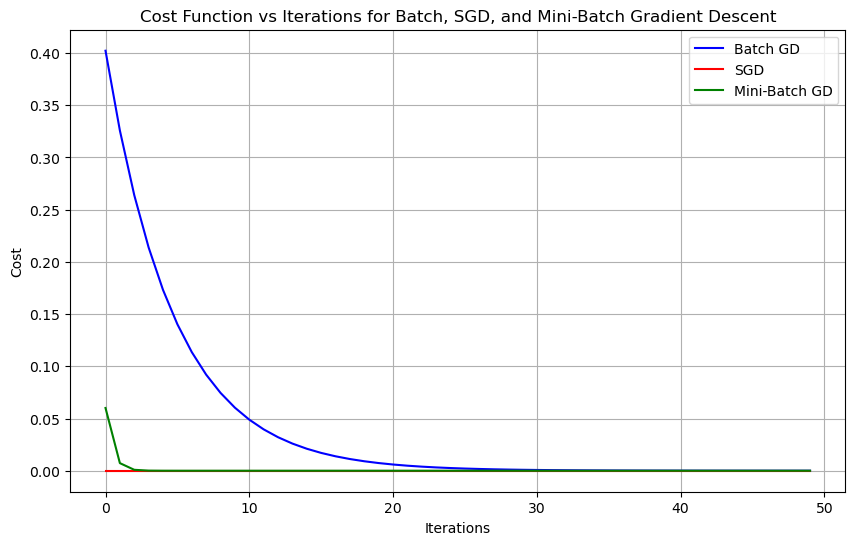

In [45]:
# Choose a learning rate
learning_rate = 0.1
iterations = 50

# Run Batch Gradient Descent (from Question 1)
theta0_batch, theta1_batch, costs_batch = gradient_descent(x_norm, y, learning_rate=learning_rate, iterations=iterations)

# Run Stochastic Gradient Descent
theta0_sgd, theta1_sgd, costs_sgd = stochastic_gradient_descent(x_norm, y, learning_rate=learning_rate, iterations=iterations)

# Run Mini-Batch Gradient Descent
theta0_mbgd, theta1_mbgd, costs_mbgd = mini_batch_gradient_descent(x_norm, y, learning_rate=learning_rate, iterations=iterations)

# Plot cost function vs iterations for all methods
plt.figure(figsize=(10, 6))
plt.plot(range(len(costs_batch)), costs_batch, label="Batch GD", color="blue")
plt.plot(range(len(costs_sgd)), costs_sgd, label="SGD", color="red")
plt.plot(range(len(costs_mbgd)), costs_mbgd, label="Mini-Batch GD", color="green")
plt.title("Cost Function vs Iterations for Batch, SGD, and Mini-Batch Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()
